# 라이브러리 불러오기

In [1]:
import keras
keras.__version__

'2.6.0'

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

# 데이터 불러오기

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4792 non-null   int64  
 1   O3_index    4792 non-null   float64
 2   O2_index    4792 non-null   float64
 3   sigma_star  4792 non-null   float64
 4   sigma_o3    4792 non-null   float64
 5   u_g         4792 non-null   float64
 6   g_r         4792 non-null   float64
 7   r_i         4792 non-null   float64
 8   i_z         4792 non-null   float64
 9   class       4792 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 374.5 KB


In [5]:
# ID를 인덱스로 사용
train = train.set_index('ID')
test = test.set_index('ID')

In [6]:
# # data 샘플링 : 사용하지 않음.
# train = train.sample(frac=1, random_state=365)
# test = test.sample(frac=1, random_state=365)

In [7]:
train.head()

,O3_index,O2_index,sigma_star,sigma_o3,u_g,g_r,r_i,i_z,class
ID,,,,,,,,,
0,-0.273588,0.231169,2.328258,1.936722,3.280691,0.421998,0.958516,-0.776998,1
1,0.451072,0.937382,2.268922,2.418982,2.170366,1.061678,0.319187,0.442557,4
2,0.510605,0.151374,1.612544,1.865838,0.508636,0.128126,-0.085479,0.186809,1
3,-0.071593,0.475677,1.705409,1.896251,1.299264,-0.386337,0.471262,-0.569618,1
4,0.599686,0.548090,2.929419,1.919131,2.159247,0.386518,0.000468,0.200131,1


In [8]:
test.head()

,O3_index,O2_index,sigma_star,sigma_o3,u_g,g_r,r_i,i_z
ID,,,,,,,,
4792,0.170767,0.789833,1.903801,1.916217,0.000000,0.000000,0.000000,0.000000
4793,0.865944,0.504653,2.230665,2.176961,1.494635,0.807948,0.330087,0.305801
4794,-0.442804,0.029528,2.273438,2.231962,1.732282,1.056049,0.347226,0.416069
4795,0.389172,0.478798,2.462933,1.950633,1.802273,0.553316,0.246908,0.120866
4796,-0.317761,0.411687,2.541002,1.936176,-1.048994,1.808624,1.178145,-1.242889


In [9]:
print(f"train shape : {train.shape}")
print(f"test shape : {test.shape}")

train shape : (4792, 9)
test shape : (1199, 8)


In [10]:
print("<<Info>>")
print(train.info())
print("\n\n<<Describe>>")
print(train.describe())

<<Info>>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4791
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   O3_index    4792 non-null   float64
 1   O2_index    4792 non-null   float64
 2   sigma_star  4792 non-null   float64
 3   sigma_o3    4792 non-null   float64
 4   u_g         4792 non-null   float64
 5   g_r         4792 non-null   float64
 6   r_i         4792 non-null   float64
 7   i_z         4792 non-null   float64
 8   class       4792 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 374.4 KB
None


<<Describe>>
          O3_index     O2_index   sigma_star     sigma_o3          u_g  \
count  4792.000000  4792.000000  4792.000000  4792.000000  4792.000000   
mean      0.100454     0.408288     2.146874     2.049127     1.428489   
std       0.395793     0.233448     0.386399     0.161122     1.416444   
min      -1.077344    -0.393085     1.099891     1.781713   -22.67

In [11]:
print("<<Info>>")
print(test.info())
print("\n\n<<Describe>>")
print(test.describe())

<<Info>>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 4792 to 5990
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   O3_index    1199 non-null   float64
 1   O2_index    1199 non-null   float64
 2   sigma_star  1199 non-null   float64
 3   sigma_o3    1199 non-null   float64
 4   u_g         1199 non-null   float64
 5   g_r         1199 non-null   float64
 6   r_i         1199 non-null   float64
 7   i_z         1199 non-null   float64
dtypes: float64(8)
memory usage: 84.3 KB
None


<<Describe>>
          O3_index     O2_index   sigma_star     sigma_o3          u_g  \
count  1199.000000  1199.000000  1199.000000  1199.000000  1199.000000   
mean      0.112277     0.413362     2.151671     2.051109     1.404323   
std       0.383080     0.234725     0.387940     0.162774     1.422439   
min      -0.882109    -0.480606     1.099769     1.791830   -22.024016   
25%      -0.161243     0.260862     1.928

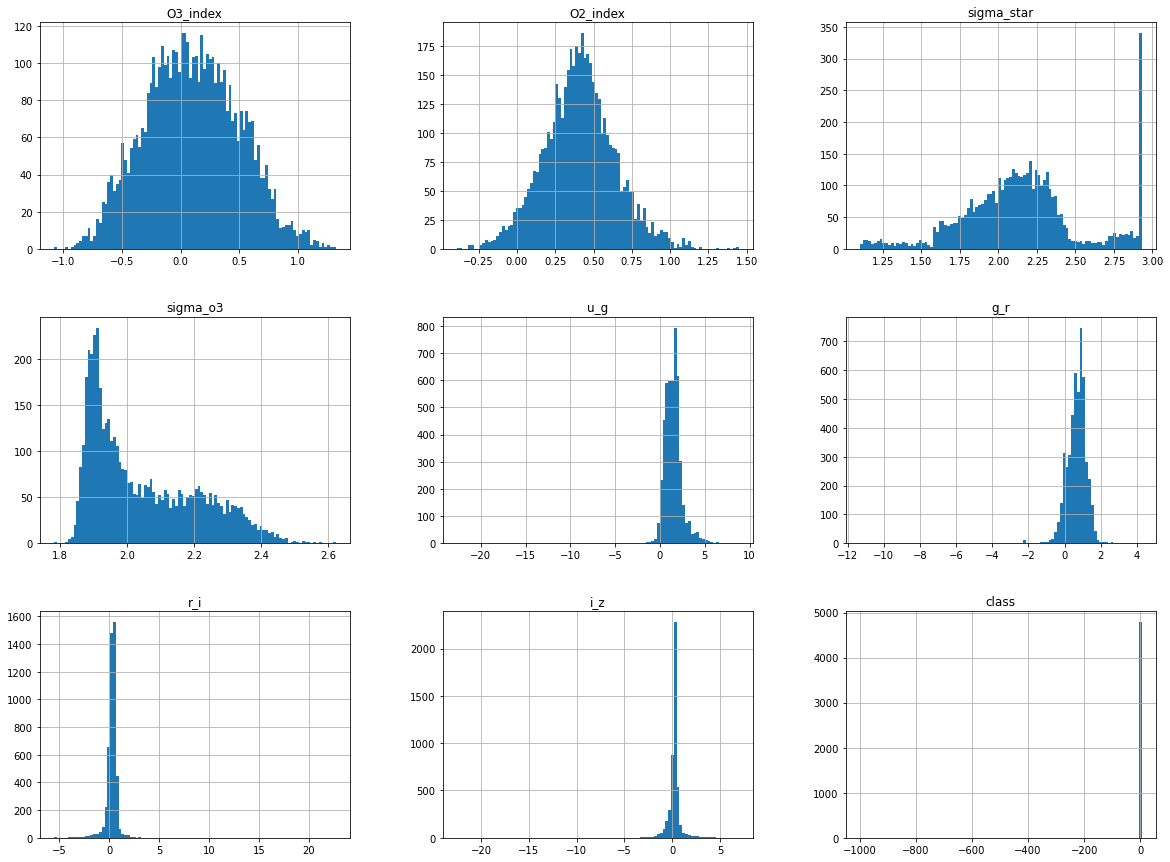

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

train.hist(bins=100, figsize=(20, 15))
plt.show()

<AxesSubplot:>

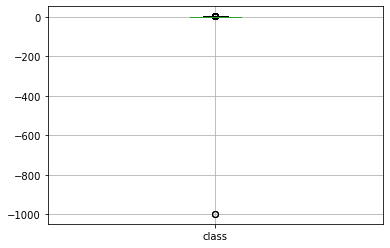

In [13]:
train.boxplot('class')

In [14]:
train['class'].value_counts() / len(train)

 1      0.592863
 2      0.226002
 3      0.093907
 4      0.086603
-999    0.000626
Name: class, dtype: float64

# 종속변수 독립변수 분할

In [15]:
x_train = train.drop(['class'], axis=1) # 독립변수
y_train = train['class'] # 종속변수

In [16]:
x_train.head()

,O3_index,O2_index,sigma_star,sigma_o3,u_g,g_r,r_i,i_z
ID,,,,,,,,
0,-0.273588,0.231169,2.328258,1.936722,3.280691,0.421998,0.958516,-0.776998
1,0.451072,0.937382,2.268922,2.418982,2.170366,1.061678,0.319187,0.442557
2,0.510605,0.151374,1.612544,1.865838,0.508636,0.128126,-0.085479,0.186809
3,-0.071593,0.475677,1.705409,1.896251,1.299264,-0.386337,0.471262,-0.569618
4,0.599686,0.548090,2.929419,1.919131,2.159247,0.386518,0.000468,0.200131


In [17]:
y_train.head()

ID
0    1
1    4
2    1
3    1
4    1
Name: class, dtype: int64

# 데이터 전처리

In [18]:
# 1. 종속변수의 이상치 제거

In [19]:
y_train.value_counts()

 1      2841
 2      1083
 3       450
 4       415
-999       3
Name: class, dtype: int64

In [20]:
def find_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5);
    upper_bound = q3 - (iqr * 1.5);
    
    return np.where(data == -999)

In [21]:
find_outliers(train['class'])

(array([1146, 1547, 2019], dtype=int64),)

In [22]:
# 최빈값 1로 이상치 대체
y_train[y_train.index == 1146] = 1
y_train[y_train.index == 1547] = 1
y_train[y_train.index == 2019] = 1

<ipython-input-22-49e465bf7c8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train.index == 1146] = 1
<ipython-input-22-49e465bf7c8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train.index == 1547] = 1
<ipython-input-22-49e465bf7c8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train.index == 2019] = 1


In [23]:
y_train.value_counts()

1    2844
2    1083
3     450
4     415
Name: class, dtype: int64

In [24]:
# 2. 종속 변수 전처리
# one hot encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_train)
y_train = LE.transform(y_train)

In [25]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)

In [26]:
y_train # 0 : 1 / 1 : 2 / 2 : 3 / 3 : 4

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [27]:
#3. 독립변수들의 전처리
# PCA 분석
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=8)
pca.fit(x_train)

PCA(n_components=8)

In [29]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4791
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   O3_index    4792 non-null   float64
 1   O2_index    4792 non-null   float64
 2   sigma_star  4792 non-null   float64
 3   sigma_o3    4792 non-null   float64
 4   u_g         4792 non-null   float64
 5   g_r         4792 non-null   float64
 6   r_i         4792 non-null   float64
 7   i_z         4792 non-null   float64
dtypes: float64(8)
memory usage: 336.9 KB


In [30]:
pca.explained_variance_

array([3.77837149, 0.72186821, 0.30573183, 0.21020826, 0.13207625,
       0.10536658, 0.03559721, 0.01265057])

Text(0, 0.5, 'Cumulative explained variance')

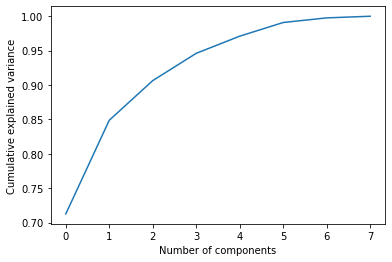

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [32]:
pca = PCA(n_components=8) # 독립변수는 축소하지 않는 것이 더 좋다.
x_pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(test)

pca_std = np.std(x_pca_train)

In [33]:
x_pca_train.shape

(4792, 8)

In [34]:
# 하지 않는 것이 더 좋다.
# #정규화
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(x_train)
# scaled_x_train = pd.DataFrame(scaler.transform(x_train))
# scaled_test = pd.DataFrame(scaler.transform(test))

# # 표준화
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# scaler.fit(x_train)
# scaled_x_train = pd.DataFrame(scaler.transform(x_train))
# scaled_test = pd.DataFrame(scaler.transform(test))

In [35]:
# scaled_x_train.hist(bins=100, figsize=(20, 15))
# plt.show()

# 모델 구성하기

In [36]:
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

In [37]:
input_node = 8 # 독립변수 갯수
hidden_node = [64, 64] # 은닉층
output_node = 4 # 종속변수 갯수
drop_rate = 0.5

In [38]:
model = models.Sequential()

model.add(Dense(hidden_node[0], input_dim = input_node, kernel_initializer = 'normal', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(drop_rate))

model.add(Dense(hidden_node[1], activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(drop_rate))

model.add(Dense(output_node, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [40]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [ ]:
model.fit(x_pca_train, y_train, epochs = 150, batch_size = 32, validation_split = 0.3)

Epoch 1/150


# 데이터 예측

In [ ]:
# test 데이터 예측
y_pred = model.predict(pca_test)
print(y_pred)

In [ ]:
# 예측값 확인
print(y_pred.argmax(axis=1))

In [ ]:
temp_y = pd.DataFrame(y_pred.argmax(axis=1))

In [ ]:
temp_y.rename(columns={ 0 : 'class'})

In [ ]:
temp_y = temp_y+1

In [ ]:
temp_y. head()

In [ ]:
temp_y.value_counts()

In [ ]:
temp_y.info()

In [ ]:
np.unique(y_pred.argmax(axis=1), return_counts = True)

# 제출 파일 생성

In [ ]:
submission = pd.read_csv('submission_9조.csv')

In [ ]:
submission

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
submission['ID'] = test['ID']

In [ ]:
submission['class'] = temp_y[0]

In [ ]:
submission.info()

In [ ]:
submission.to_csv('submission.csv', index=False)